In [102]:
import pandas as pd
import glob

## 후보/연도별로 연설 합치기

In [103]:
df = None
for file in glob.glob('to_preprocess/*'):
    df_curr = pd.read_csv(file, index_col=0)
    df_curr["Year"] = int(file.split("\\")[-1][0:4])
    if df is None:
        df = df_curr
    else:
        df = pd.concat([df,df_curr])

In [104]:
df

name                date  \
0                      Charles E. Hughes        June 10, 1916   
0                         Woodrow Wilson   September 02, 1916   
0                           James M. Cox      August 07, 1920   
0                      Warren G. Harding        July 22, 1920   
0                        Calvin Coolidge      August 14, 1924   
..                                    ...                 ...   
1               Donald J. Trump               August 27, 2020   
2               Donald J. Trump              October 13, 2020   
3               Donald J. Trump              October 30, 2020   
4               Donald J. Trump             November 05, 2020   
5               Donald J. Trump             December 02, 2020   

                                               speech  elected  Year  
0   ['Mr. Chairman and Delegates:', 'I have not de...        0  1916  
0   ['Senator James, Gentlemen of the Notification...        1  1916  
0   ['Chairman Robinson, and members of the Notifi...        0  1920  
0   ['Chairman Lodge, Members of the Notification ...        1  1920  
0   ['Mr. Chairman, Members of the Committee, Ladi...        1  1924  
..                                                ...      ...   ...  
1   ['Thank you very much. Thank you very much. Th...        0  2020  
2   ['[as prepared for delivery]', '21 days from n...        0  2020  
3   ['[as prepared for delivery]', 'Your far-left ...        0  2020  
4   ["Good evening. I'd like to provide the Americ...        0  2020  
5   ['[APP Note: The claims about election fraud c...        0  2020  

[3341 rows x 5 columns]

In [105]:
csv_file_path = r"C:\Users\user\Desktop\kdt\data\Project2\to_preprocess\to_processed_speeches.csv"
df.to_csv(csv_file_path, index=False)

print(f"CSV 파일이 {csv_file_path}에 저장되었습니다.")

CSV 파일이 C:\Users\user\Desktop\kdt\data\Project2\to_preprocess\to_processed_speeches.csv에 저장되었습니다.


## 연도 분포 확인

<Axes: xlabel='Year'>

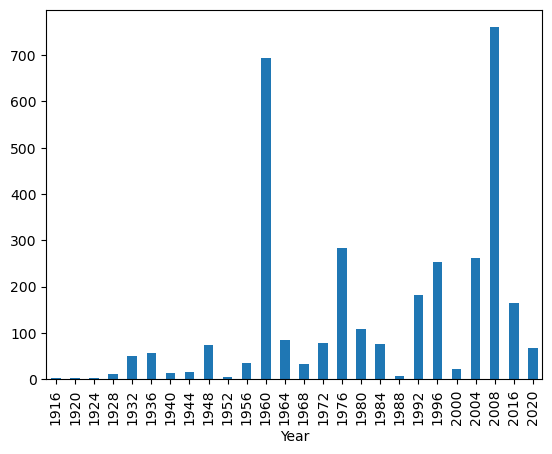

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df.groupby("Year")["Year"].value_counts().plot.bar(ax=ax)
# ax.hist(df["Year"], bins=range(1920,2024,4))

Year
1916      2
1920      2
1924      2
1928     11
1932     51
1936     57
1940     14
1944     15
1948     73
1952      4
1956     34
1960    693
1964     85
1968     33
1972     79
1976    283
1980    108
1984     77
1988      7
1992    182
1996    253
2000     22
2004    262
2008    760
2016    165
2020     67
Name: count, dtype: int64

## 후보별 분포 확인

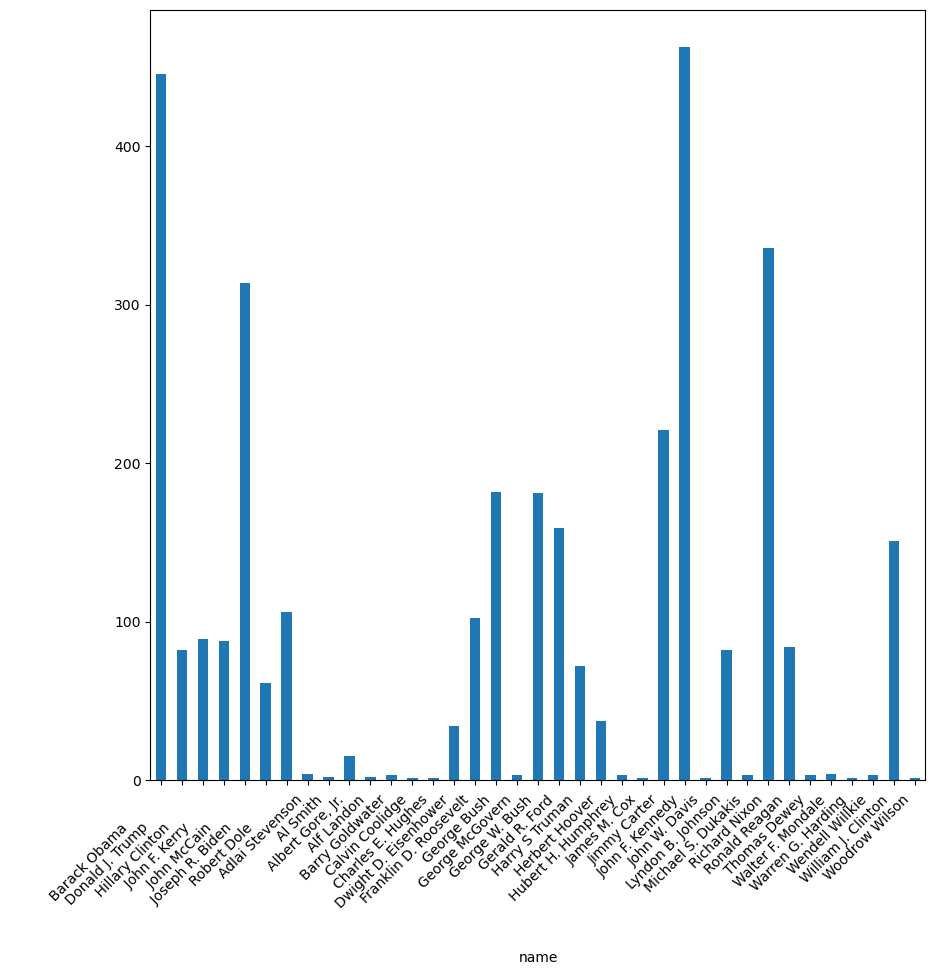

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

df.groupby("name")["name"].value_counts().plot.bar(ax=ax)
# ax.hist(df["name"])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [14]:
import ast 

df["joined_speech"] = df["speech"].apply(lambda l: ' '.join(ast.literal_eval(l)))

## 길이 분포 확인

(array([1201., 1088.,  645.,  295.,   46.,   31.,   20.,    7.,    5.,
           3.]),
 array([   25. ,  1422.4,  2819.8,  4217.2,  5614.6,  7012. ,  8409.4,
         9806.8, 11204.2, 12601.6, 13999. ]),
 <BarContainer object of 10 artists>)

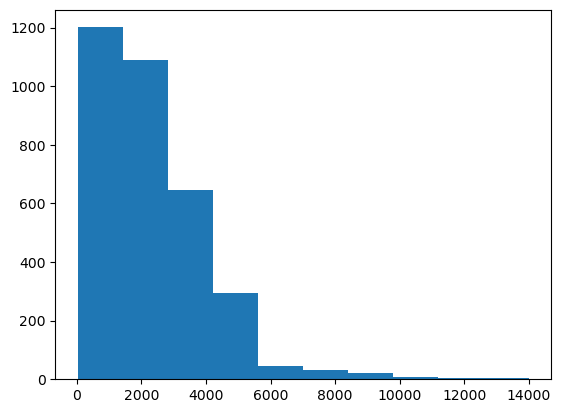

In [15]:
fig, ax = plt.subplots()

ax.hist(df["joined_speech"].apply(lambda l: len(l.split(' '))))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3341 non-null   object
 1   date           3341 non-null   object
 2   speech         3341 non-null   object
 3   elected        3341 non-null   int64 
 4   Year           3341 non-null   int64 
 5   joined_speech  3341 non-null   object
dtypes: int64(2), object(4)
memory usage: 182.7+ KB


In [17]:
import ast
ast.literal_eval(df["speech"].values[0])

['Mr. Chairman and Delegates:',
 'I have not desired the nomination. I have wished to remain on the bench. But in this critical period of our national history I recognize that it is your right to summon and that it is my paramount duty to respond. You speak at a time of national exigency transcending merely partisan consideration.',
 'You voice the demand for a dominant, thorough-going Americanism, with firm, protective upbuilding policies essential to our peace and security, and to that call, in this crisis, I cannot fail to answer with the pledge of all that is in me to the service of our country. Therefore I accept the nomination.',
 'I stand for the firm and unflinching maintenance of all the rights of American citizens on land and sea. I neither impugn motives nor underestimate difficulties. But it is most regrettably true that in our foreign relations we have suffered incalculably from the weak and vacillating course which has been taken with regard to Mexico, a course lamentably

In [136]:
# 토큰화 및 특수문자/ 불용어 제거

import nltk
from nltk.corpus import stopwords
import re

# NLTK에서 불용어 다운로드 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
# NLTK 불용어 리스트
stop_words = set(stopwords.words('english'))

# 전처리 함수 정의 (소문자 변환, 특수 문자 제거, 불용어 제거)
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s\'\-\?!]', ' ', text)
    # Unicode 대시 기호를 공백으로 대체
    text = re.sub(r'[—–-]', ' ', text)
    # 토큰화
    words = nltk.word_tokenize(text)
    
    # 'US'를 대문자로 변환
    words = ['US' if word == 'US' else word.lower() for word in words]
    return ' '.join(words)
 
# 'speech' 열에 전처리 함수 적용
df['cleaned_speech'] = df['speech'].apply(preprocess_text)

In [96]:
df

name                date  \
0                      Charles E. Hughes        June 10, 1916   
0                         Woodrow Wilson   September 02, 1916   
0                           James M. Cox      August 07, 1920   
0                      Warren G. Harding        July 22, 1920   
0                        Calvin Coolidge      August 14, 1924   
..                                    ...                 ...   
1               Donald J. Trump               August 27, 2020   
2               Donald J. Trump              October 13, 2020   
3               Donald J. Trump              October 30, 2020   
4               Donald J. Trump             November 05, 2020   
5               Donald J. Trump             December 02, 2020   

                                               speech  elected  Year  \
0   ['Mr. Chairman and Delegates:', 'I have not de...        0  1916   
0   ['Senator James, Gentlemen of the Notification...        1  1916   
0   ['Chairman Robinson, and members of the Notifi...        0  1920   
0   ['Chairman Lodge, Members of the Notification ...        1  1920   
0   ['Mr. Chairman, Members of the Committee, Ladi...        1  1924   
..                                                ...      ...   ...   
1   ['Thank you very much. Thank you very much. Th...        0  2020   
2   ['[as prepared for delivery]', '21 days from n...        0  2020   
3   ['[as prepared for delivery]', 'Your far-left ...        0  2020   
4   ["Good evening. I'd like to provide the Americ...        0  2020   
5   ['[APP Note: The claims about election fraud c...        0  2020   

                                        joined_speech  \
0   Mr. Chairman and Delegates: I have not desired...   
0   Senator James, Gentlemen of the Notification C...   
0   Chairman Robinson, and members of the Notifica...   
0   Chairman Lodge, Members of the Notification Co...   
0   Mr. Chairman, Members of the Committee, Ladies...   
..                                                ...   
1   Thank you very much. Thank you very much. Than...   
2   [as prepared for delivery] 21 days from now, w...   
3   [as prepared for delivery] Your far-left Democ...   
4   Good evening. I'd like to provide the American...   
5   [APP Note: The claims about election fraud con...   

                                       cleaned_speech  
0   'mr chairman delegates desired nomination wish...  
0   'senator james gentlemen notification committe...  
0   'chairman robinson members notification commit...  
0   'chairman lodge members notification committee...  
0   'mr chairman members committee ladies gentleme...  
..                                                ...  
1   'thank much thank much thank applause 'thank m...  
2   'as prepared delivery days going win commonwea...  
3   'as prepared delivery 'your far left democrat ...  
4   good evening like provide american people upda...  
5   'app note claims election fraud contained tran...  

[3341 rows x 7 columns]

In [108]:
# TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
# 연도별 후보자별 TF-IDF 계산 함수 정의
def calculate_tfidf_by_year_and_candidate(df):
    results = {}
    idf_results = {}
    years = df['Year'].unique()
    for year in years:
        candidates_in_year = df[df['Year'] == year]['name'].unique()
        for candidate in candidates_in_year:
            subset_df = df[(df['Year'] == year) & (df['name'] == candidate)]
            vectorizer = TfidfVectorizer()
            tfidf_matrix = vectorizer.fit_transform(subset_df['cleaned_speech'])
            feature_names = vectorizer.get_feature_names_out()
            dense = tfidf_matrix.todense()
            df_tfidf = pd.DataFrame(dense, columns=feature_names)
            # 평균 TF-IDF 계산 후 내림차순 정렬
            avg_tfidf = df_tfidf.mean().sort_values(ascending=False)
            results[f"Year {year}, Candidate {candidate}"] = avg_tfidf
            # IDF 값 저장
            idf_values = vectorizer.idf_
            idf_results[f"Year {year}, Candidate {candidate}"] = dict(zip(feature_names, idf_values))
    return results, idf_results

In [116]:
# 연도별 후보자별 TF-IDF 및 IDF 계산
yearly_candidate_tfidf, yearly_candidate_idf = calculate_tfidf_by_year_and_candidate(df)

In [117]:
# 결과 출력
print("연도별 후보자별 TF-IDF:")
for key, tfidf in yearly_candidate_tfidf.items():
    print(key + ":")
    print(tfidf.head(10))  # 상위 10개 단어 출력
    print()

연도별 후보자별 TF-IDF:
Year 1916, Candidate Charles E. Hughes :
must             0.359908
national         0.287926
foreign          0.143963
upon             0.143963
country          0.143963
rights           0.143963
service          0.107972
may              0.107972
international    0.107972
partisan         0.107972
dtype: float64

Year 1916, Candidate Woodrow Wilson :
must        0.241478
people      0.206981
upon        0.206981
world       0.189733
new         0.181109
business    0.181109
party       0.163860
country     0.146612
men         0.146612
life        0.129363
dtype: float64

Year 1920, Candidate James M. Cox :
government    0.289303
would         0.223321
war           0.197944
one           0.152265
every         0.147189
league        0.142114
the           0.142114
men           0.137038
party         0.131963
many          0.131963
dtype: float64

Year 1920, Candidate Warren G. Harding :
world         0.308073
government    0.301518
american      0.262189
america   

In [121]:
print("연도별 후보자별 IDF:")
for key, idf in yearly_candidate_idf.items():
    print(key + ":")
    sorted_idf = sorted(idf.items(), key=lambda item: item[1], reverse=True)
    for word, value in sorted_idf[:10]:  # 상위 10개 단어 출력
        print(f"{word}: {value}")
stop_words = set(stopwords.words('english'))

연도별 후보자별 IDF:
Year 1916, Candidate Charles E. Hughes :
abiding: 1.0
ability: 1.0
abroad: 1.0
absolutely: 1.0
accept: 1.0
accordance: 1.0
achievements: 1.0
adequate: 1.0
adequately: 1.0
administration: 1.0

Year 1916, Candidate Woodrow Wilson :
able: 1.0
accept: 1.0
accepted: 1.0
accessible: 1.0
accidents: 1.0
accommodated: 1.0
accommodating: 1.0
accommodation: 1.0
accomplished: 1.0
account: 1.0

Year 1920, Candidate James M. Cox :
abiding: 1.0
able: 1.0
abridge: 1.0
abroad: 1.0
absolute: 1.0
absolutely: 1.0
abstract: 1.0
abuse: 1.0
abused: 1.0
abuses: 1.0

Year 1920, Candidate Warren G. Harding :
abhorrence: 1.0
abide: 1.0
abiding: 1.0
ability: 1.0
able: 1.0
abnormal: 1.0
abnormalities: 1.0
abridge: 1.0
abroad: 1.0
abundantly: 1.0

Year 1924, Candidate Calvin Coolidge :
abiding: 1.0
ability: 1.0
able: 1.0
abolished: 1.0
abolishing: 1.0
abounding: 1.0
abroad: 1.0
absolute: 1.0
abstract: 1.0
abundant: 1.0

Year 1924, Candidate John W. Davis :
able: 1.0
ably: 1.0
abroad: 1.0
absent: 1.0
a

In [137]:
print("연도별 후보자별 IDF:")
for key, idf in yearly_candidate_idf.items():
    print(key + ":")
    sorted_idf = sorted(idf.items(), key=lambda item: item[1], reverse=False)  # IDF 오름차순 정렬
    for word, value in sorted_idf[:10]:  # 하위 10개 단어 출력
        print(f"{word}: {value}")
    print()

연도별 후보자별 IDF:
Year 1916, Candidate Charles E. Hughes :
abiding: 1.0
ability: 1.0
abroad: 1.0
absolutely: 1.0
accept: 1.0
accordance: 1.0
achievements: 1.0
adequate: 1.0
adequately: 1.0
administration: 1.0

Year 1916, Candidate Woodrow Wilson :
able: 1.0
accept: 1.0
accepted: 1.0
accessible: 1.0
accidents: 1.0
accommodated: 1.0
accommodating: 1.0
accommodation: 1.0
accomplished: 1.0
account: 1.0

Year 1920, Candidate James M. Cox :
abiding: 1.0
able: 1.0
abridge: 1.0
abroad: 1.0
absolute: 1.0
absolutely: 1.0
abstract: 1.0
abuse: 1.0
abused: 1.0
abuses: 1.0

Year 1920, Candidate Warren G. Harding :
abhorrence: 1.0
abide: 1.0
abiding: 1.0
ability: 1.0
able: 1.0
abnormal: 1.0
abnormalities: 1.0
abridge: 1.0
abroad: 1.0
abundantly: 1.0

Year 1924, Candidate Calvin Coolidge :
abiding: 1.0
ability: 1.0
able: 1.0
abolished: 1.0
abolishing: 1.0
abounding: 1.0
abroad: 1.0
absolute: 1.0
abstract: 1.0
abundant: 1.0

Year 1924, Candidate John W. Davis :
able: 1.0
ably: 1.0
abroad: 1.0
absent: 1.0
a

In [118]:
# TF-IDF 결과 출력 (불용어 처리관점)
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
df_tfidf = pd.DataFrame(dense, columns=feature_names)

# 상위 50개 단어 출력 (전체 연설문)
top_n = 50
top_words_idx = df_tfidf.mean().sort_values(ascending=False).head(top_n).index
top_words_values = df_tfidf.mean().sort_values(ascending=False).head(top_n).values
top_words_df = pd.DataFrame({'단어': top_words_idx, 'TF-IDF 값': top_words_values})

In [119]:
print("상위 50개 단어와 TF-IDF 값:")
print(top_words_df)

상위 50개 단어와 TF-IDF 값:
            단어  TF-IDF 값
0       people  0.066631
1      america  0.054792
2        going  0.047781
3           re  0.047566
4      country  0.046768
5    president  0.045007
6         want  0.042785
7          one  0.041688
8           ve  0.041270
9        years  0.041160
10        know  0.040850
11    applause  0.037940
12       world  0.036610
13    american  0.035923
14       would  0.035790
15       think  0.034794
16      states  0.032470
17        make  0.032350
18         say  0.032327
19         new  0.032184
20      united  0.031845
21       great  0.031648
22  government  0.030042
23        time  0.029705
24        must  0.028169
25       every  0.027163
26         get  0.026962
27       thank  0.026892
28        said  0.026334
29         let  0.026049
30     believe  0.025467
31        work  0.024660
32       today  0.024514
33        good  0.024317
34          ll  0.024077
35     senator  0.024070
36         tax  0.023849
37       state  0.023678
38  

In [120]:
# 하위 50개 단어 출력
bottom_n = 50
bottom_words_idx = df_tfidf.mean().sort_values().head(bottom_n).index
bottom_words_values = df_tfidf.mean().sort_values().head(bottom_n).values
bottom_words_df = pd.DataFrame({'단어': bottom_words_idx, 'TF-IDF 값': bottom_words_values})
print("하위 50개 단어와 TF-IDF 값:")
print(bottom_words_df)

하위 50개 단어와 TF-IDF 값:
                 단어  TF-IDF 값
0            maples  0.000003
1               lat  0.000003
2            berman  0.000003
3            pedals  0.000003
4            faiyad  0.000003
5     publicitywise  0.000003
6       incredulous  0.000003
7         compating  0.000003
8      miklaszewski  0.000003
9       orchestrate  0.000003
10      inclusively  0.000003
11          couches  0.000003
12           cnnorc  0.000003
13       mayweather  0.000003
14          quickie  0.000003
15        laguardia  0.000003
16       dealmakers  0.000003
17       excavation  0.000003
18           neater  0.000003
19          matchup  0.000003
20         weirdest  0.000003
21          nabisco  0.000003
22           costed  0.000003
23          goodell  0.000003
24        pillsbury  0.000003
25         takeaway  0.000003
26              fbn  0.000003
27          tremend  0.000003
28            hampr  0.000003
29       excavators  0.000003
30     unfortunatel  0.000003
31  incompetentwhen

In [123]:
# 전체 연설문에 대한 IDF 값 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['cleaned_speech'])
idf_values = vectorizer.idf_
idf_dict = dict(zip(vectorizer.get_feature_names_out(), idf_values))

# IDF 값 출력
print("전체 연설문에 대한 IDF 값:")
sorted_idf = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
for word, value in sorted_idf[:50]:  # 상위 50개 단어 출력 -> 하위로도 확인 
    print(f"{word}: {value}")

전체 연설문에 대한 IDF 값:
aaa: 8.421177528595393
aadp: 8.421177528595393
aah: 8.421177528595393
aanything: 8.421177528595393
abashed: 8.421177528595393
abating: 8.421177528595393
abba: 8.421177528595393
abbeville: 8.421177528595393
abbeyville: 8.421177528595393
abbie: 8.421177528595393
abbreviated: 8.421177528595393
abdicates: 8.421177528595393
abduction: 8.421177528595393
abductions: 8.421177528595393
abecedarian: 8.421177528595393
abedin: 8.421177528595393
aberrant: 8.421177528595393
abg: 8.421177528595393
abided: 8.421177528595393
abides: 8.421177528595393
abingdon: 8.421177528595393
abington: 8.421177528595393
abjectly: 8.421177528595393
abkhaz: 8.421177528595393
abled: 8.421177528595393
abnormalities: 8.421177528595393
abnormally: 8.421177528595393
abolishes: 8.421177528595393
abolishment: 8.421177528595393
abominations: 8.421177528595393
aborted: 8.421177528595393
abortive: 8.421177528595393
abounding: 8.421177528595393
abounds: 8.421177528595393
aboveboard: 8.421177528595393
abridging: 

In [52]:
# 연도별 후보자별 TF-IDF 계산 함수 정의
def calculate_tfidf_by_year_and_candidate(df):
    results = {}
    years = df['Year'].unique()
    for year in years:
        candidates_in_year = df[df['Year'] == year]['name'].unique()
        for candidate in candidates_in_year:
            subset_df = df[(df['Year'] == year) & (df['name'] == candidate)]
            vectorizer = TfidfVectorizer()
            tfidf_matrix = vectorizer.fit_transform(subset_df['cleaned_speech'])
            feature_names = vectorizer.get_feature_names_out()
            dense = tfidf_matrix.todense()
            df_tfidf = pd.DataFrame(dense, columns=feature_names)
            # 평균 TF-IDF 계산 후 내림차순 정렬
            avg_tfidf = df_tfidf.mean().sort_values(ascending=False)
            results[f"Year {year}, Candidate {candidate}"] = avg_tfidf
    return results

# 연도별 후보자별 TF-IDF 계산
yearly_candidate_tfidf = calculate_tfidf_by_year_and_candidate(df)

# 결과 출력
print("연도별 후보자별 TF-IDF:")
for key, tfidf in yearly_candidate_tfidf.items():
    print(key + ":")
    print(tfidf.head(10))  # 상위 10개 단어 출력
    print()

연도별 후보자별 TF-IDF:
Year 1916, Candidate Charles E. Hughes :
must        0.360844
national    0.288675
upon        0.144338
rights      0.144338
country     0.144338
foreign     0.144338
partisan    0.108253
strength    0.108253
may         0.108253
stand       0.108253
dtype: float64

Year 1916, Candidate Woodrow Wilson :
must        0.240745
people      0.206353
upon        0.206353
new         0.180559
business    0.180559
world       0.180559
party       0.163363
men         0.146167
country     0.146167
states      0.128971
dtype: float64

Year 1920, Candidate James M. Cox :
government    0.292239
would         0.220461
war           0.194826
every         0.148683
league        0.143556
the           0.143556
one           0.143556
many          0.133302
party         0.133302
men           0.128175
dtype: float64

Year 1920, Candidate Warren G. Harding :
world         0.305024
government    0.291762
american      0.265238
america       0.218822
must          0.212191
republic      

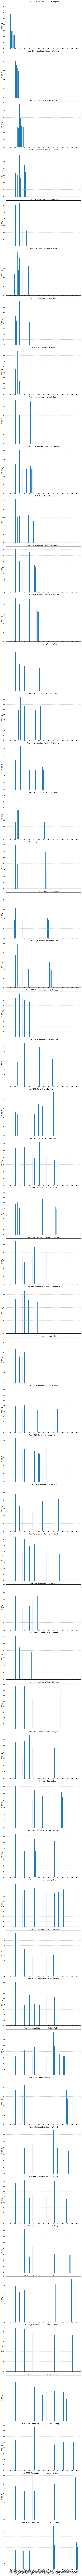

In [55]:
# 시각화 함수 정의 (막대 그래프)
def plot_tfidf_barplot(tfidf_results):
    plt.rcParams['font.family'] = 'Malgun Gothic'

    fig, axes = plt.subplots(len(tfidf_results), 1, figsize=(10, 6 * len(tfidf_results)), sharex=True)
    for i, (key, tfidf) in enumerate(tfidf_results.items()):
        ax = axes[i]
        ax.bar(tfidf.index[:10], tfidf.head(10))
        ax.set_title(key, fontsize=15)
        ax.set_ylabel('TF-IDF 값', fontsize=12)
        ax.tick_params(axis='x', labelrotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# TF-IDF 결과 시각화 (막대 그래프)
plot_tfidf_barplot(yearly_candidate_tfidf)

In [47]:
# 연도별 후보자별 TF-IDF 계산 함수
def calculate_tfidf_by_group(df, group_col):
    results = {}
    groups = df.groupby(group_col)
    for group_name, group_data in groups:
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(group_data['cleaned_speech'])
        feature_names = vectorizer.get_feature_names_out()
        dense = tfidf_matrix.todense()
        df_tfidf = pd.DataFrame(dense, columns=feature_names)
        # 평균 TF-IDF 계산 후 내림차순 정렬
        avg_tfidf = df_tfidf.mean().sort_values(ascending=False)
        results[group_name] = avg_tfidf
    return results

In [50]:
# 연도별 TF-IDF 계산
yearly_tfidf = calculate_tfidf_by_group(df, 'Year')

# 후보자별 TF-IDF 계산
candidate_tfidf = calculate_tfidf_by_group(df, 'name')

# 결과 출력
print("연도별 TF-IDF:")
for year, tfidf in yearly_tfidf.items():
    print(f"Year {year}:")
    print(tfidf.head(10))  # 상위 10개 단어 출력

print("\n후보자별 TF-IDF:")
for candidate, tfidf in candidate_tfidf.items():
    print(f"Candidate {candidate}:")
    print(tfidf.head(10))  # 상위 10개 단어 출력

연도별 TF-IDF:
Year 1916:
must        0.254945
national    0.157721
upon        0.146142
country     0.121990
people      0.116384
new         0.101836
party       0.092137
foreign     0.090937
business    0.088290
world       0.088290
dtype: float64
Year 1920:
government    0.275093
world         0.188918
american      0.162729
war           0.153729
america       0.142852
must          0.139674
party         0.134793
people        0.126915
one           0.126825
would         0.124271
dtype: float64
Year 1924:
government    0.242680
people        0.181388
one           0.134778
party         0.133137
every         0.130882
country       0.128375
american      0.117823
must          0.103248
shall         0.102743
public        0.096845
dtype: float64
Year 1928:
government    0.145780
people        0.118348
party         0.104279
great         0.101350
upon          0.099865
american      0.094898
country       0.086941
business      0.086318
every         0.083676
would         0.082709

In [125]:
# TF-IDF 계산 함수 정의
def calculate_tfidf(df):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_speech'])
    feature_names = vectorizer.get_feature_names_out()
    dense = tfidf_matrix.todense()
    df_tfidf = pd.DataFrame(dense, columns=feature_names)
    return df_tfidf, feature_names

In [127]:
# 클러스터링 수행

from sklearn.cluster import KMeans

num_clusters = 3  # 예시로 클러스터 개수를 3으로 설정
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['cleaned_speech'])
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=3, random_state=42)

In [128]:
# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = kmeans.labels_

In [131]:
# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = kmeans.labels_

# 연도별 클러스터별 TF-IDF 계산 함수 정의
def calculate_tfidf_by_year_and_cluster(df):
    results = {}
    years = df['Year'].unique()
    for year in years:
        clusters_in_year = df[df['Year'] == year]['cluster'].unique()
        for cluster in clusters_in_year:
            subset_df = df[(df['Year'] == year) & (df['cluster'] == cluster)]
            df_tfidf, feature_names = calculate_tfidf(subset_df)
            # 평균 TF-IDF 계산 후 내림차순 정렬
            avg_tfidf = df_tfidf.mean().sort_values(ascending=False)
            results[f"Year {year}, Cluster {cluster}"] = avg_tfidf
    return results

In [132]:
# 연도별 클러스터별 TF-IDF 계산
yearly_cluster_tfidf = calculate_tfidf_by_year_and_cluster(df)

# 그래프 생성 함수 정의 (막대 그래프)
def plot_tfidf_barplot(tfidf_results):
    fig, axes = plt.subplots(len(tfidf_results), 1, figsize=(10, 6 * len(tfidf_results)), sharex=True)
    for i, (key, tfidf) in enumerate(tfidf_results.items()):
        ax = axes[i]
        ax.bar(tfidf.index[:10], tfidf.head(10))
        ax.set_title(key, fontsize=15)
        ax.set_ylabel('TF-IDF 값', fontsize=12)
        ax.tick_params(axis='x', labelrotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

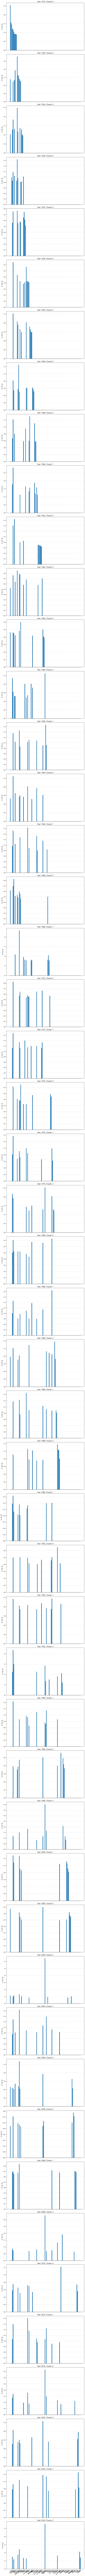

In [133]:
# TF-IDF 결과 시각화 (막대 그래프)
plot_tfidf_barplot(yearly_cluster_tfidf)

In [135]:
# 연도별 상위 3개 키워드 추출 함수 정의
def top_keywords_by_year(df):
    results = {}
    years = df['Year'].unique()
    for year in years:
        subset_df = df[df['Year'] == year]
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(subset_df['cleaned_speech'])
        feature_names = vectorizer.get_feature_names_out()
        dense = tfidf_matrix.todense()
        df_tfidf = pd.DataFrame(dense, columns=feature_names)
        avg_tfidf = df_tfidf.mean().sort_values(ascending=False)
        results[year] = list(avg_tfidf.index[:3])  # 상위 3개 키워드만 저장
    return results

# 연도별 상위 3개 키워드 추출
yearly_top_keywords = top_keywords_by_year(df)

# 결과 출력
for year, keywords in yearly_top_keywords.items():
    print(f"Year {year}: {', '.join(keywords)}")

Year 1916: must, national, upon
Year 1920: government, world, american
Year 1924: government, people, one
Year 1928: government, people, party
Year 1932: government, people, tariff
Year 1936: people, years, government
Year 1940: people, government, years
Year 1944: war, people, think
Year 1948: people, republican, congress
Year 1952: party, people, great
Year 1956: government, america, one
Year 1960: applause, country, people
Year 1964: people, going, want
Year 1968: new, people, america
Year 1972: people, peace, america
Year 1976: people, would, america
Year 1980: ve, people, nation
Year 1984: years, america, people
Year 1988: people, going, thank
Year 1992: ve, people, let
Year 1996: people, re, want
Year 2000: applause, america, security
Year 2004: america, re, people
Year 2008: people, obama, america
Year 2016: going, people, know
Year 2020: president, trump, people


## WordCloud

In [74]:
# !conda install wordcloud -y
from wordcloud import WordCloud


df_test = pd.read_csv('./data/orig/2020_Trump_speech.csv', index_col=0)

speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))

speeches_combined = ' '.join(speeches)

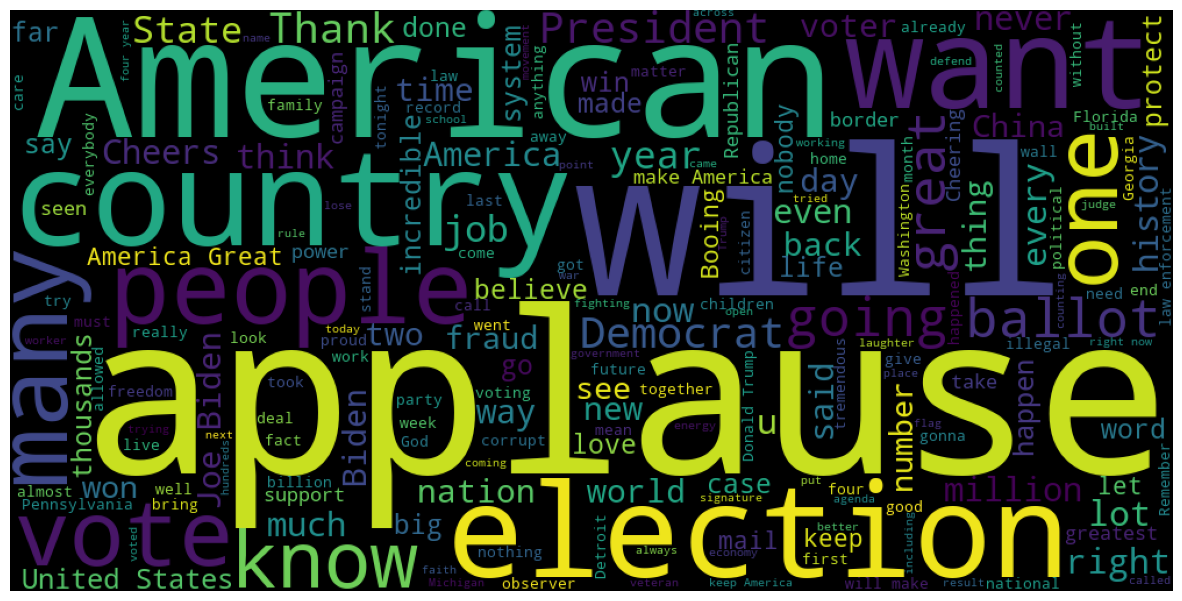

In [75]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

In [76]:
df_test = pd.read_csv('./data/to_preprocess/2020_Biden_speech_edited.csv', index_col=0)

In [77]:
speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))

speeches_combined = ' '.join(speeches)

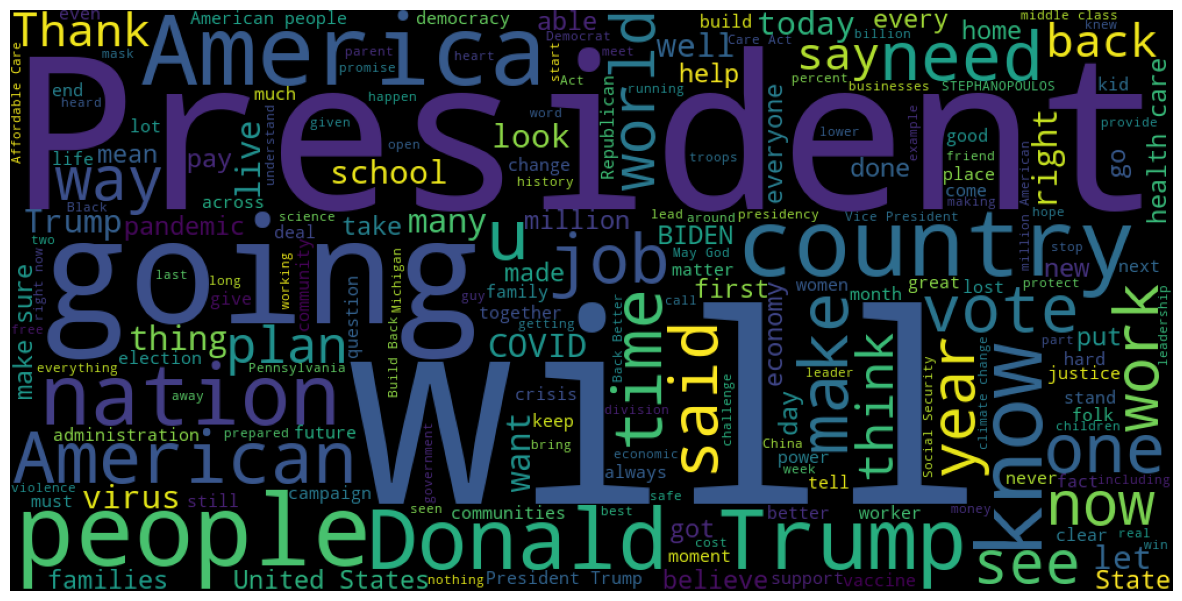

In [78]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

## LDA

In [ ]:
import re
lambda x: re.sub('[,\.!?]','',x)

lambda x: x.lower()



In [ ]:
import gensim
from gensim_utils import simple_preprocess
import nltk
nltk.download('stopwords')